# Task1. Part 2

## Common

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lxml import etree
import base64
import os.path
import functools
import math
import os
from alphabet_detector import AlphabetDetector
import subprocess
from pymystem3 import Mystem
from time import time

%matplotlib inline

In [2]:
mystem = Mystem()

In [3]:
COMMON_PATH = '../../'
DATA_PATH = COMMON_PATH + 'data/01/'
MYSTEMPATH = COMMON_PATH + "other_programs/mystem/mystem"
TMP_PATH = './'
PATH_WITH_DATA_FROM_NIKITA = DATA_PATH + 'after_first_iteration/'


In [4]:
list_of_files = ["texts.{}.base64".format(i) for i in range(0, 10)]
# list_of_files = ["texts.0.base64"]
# list_of_files = ["tmp_texts"]

## Приведите слова документов к нижнему регистру и леммам (словарным формам) с помощью mystem

In [5]:
def update_dicts(list_of_str):
    for key in list_of_str:
        if key in dict_words_numbers_words:
            dict_words_numbers_words[key] += 1
        else:
            dict_words_numbers_words[key] = 1
    
    for key in set(list_of_str):
        if key in dict_words_numbers_documents:
            dict_words_numbers_documents[key] += 1
        else:
            dict_words_numbers_documents[key] = 1

In [6]:
def decoding(path):
    texts_path = PATH_WITH_DATA_FROM_NIKITA + path
    assert(os.path.isfile(texts_path))
    
    file = open(texts_path, 'r')

    text = file.read()
    file.close()
    decoding_lines = []

    for element in text.split():
        decoding_lines.append(base64.b64decode(element))
    
    return decoding_lines

In [7]:
step_for_printing = 1000

def text_processing(decoding_lines):
    global number_of_documents
    for row in decoding_lines:
        if number_of_documents % step_for_printing == 0:
            print("step: {}".format(number_of_documents / step_for_printing))
        number_of_documents += 1
        decoding_str = row.decode().lower()
        str_after_stem = list(filter(lambda x: x.isalpha(),  mystem.lemmatize(decoding_str)))
        update_dicts(str_after_stem)


In [8]:
dict_words_numbers_words = dict()
dict_words_numbers_documents = dict()
number_of_documents = 0

for file_name in list_of_files:
   
    decoding_lines = decoding(file_name)
    text_processing(decoding_lines)

step: 0.0
step: 1.0
step: 2.0
step: 3.0
step: 4.0
step: 5.0
step: 6.0
step: 7.0
step: 8.0
step: 9.0
step: 10.0
step: 11.0
step: 12.0
step: 13.0
step: 14.0
step: 15.0
step: 16.0
step: 17.0
step: 18.0
step: 19.0
step: 20.0
step: 21.0
step: 22.0
step: 23.0
step: 24.0
step: 25.0
step: 26.0
step: 27.0
step: 28.0
step: 29.0
step: 30.0
step: 31.0
step: 32.0
step: 33.0
step: 34.0
step: 35.0
step: 36.0
step: 37.0
step: 38.0
step: 39.0
step: 40.0
step: 41.0
step: 42.0
step: 43.0
step: 44.0
step: 45.0
step: 46.0
step: 47.0
step: 48.0
step: 49.0
step: 50.0
step: 51.0
step: 52.0
step: 53.0
step: 54.0
step: 55.0
step: 56.0
step: 57.0
step: 58.0
step: 59.0
step: 60.0
step: 61.0
step: 62.0
step: 63.0
step: 64.0
step: 65.0
step: 66.0
step: 67.0
step: 68.0
step: 69.0
step: 70.0
step: 71.0
step: 72.0
step: 73.0
step: 74.0
step: 75.0
step: 76.0
step: 77.0
step: 78.0
step: 79.0
step: 80.0
step: 81.0
step: 82.0
step: 83.0
step: 84.0
step: 85.0
step: 86.0
step: 87.0
step: 88.0
step: 89.0
step: 90.0
step: 91.

## Какую долю коллекции составляют стоп-слова (их можно взять, например здесь)?  

In [9]:
file = open(DATA_PATH + 'stopwords/russian')
stop_words = list(file.read().split())

In [10]:
count_stop_words, count_not_stop_words = (0, 0)
for key, value in dict_words_numbers_words.items():
    if key in stop_words:
        count_stop_words += value
    else:
        count_not_stop_words += value
print("stop_words: {}, normal_words: {}, frequency: {}".format(count_stop_words, count_not_stop_words, count_stop_words / (count_stop_words + count_not_stop_words)))

stop_words: 29703198, normal_words: 122122345, frequency: 0.19564032120734784


## Посчитайте среднюю длину слова в коллекции и словаре

In [11]:
number_words_in_collection = sum(dict_words_numbers_words.values())
number_words_in_dict = len(dict_words_numbers_words.values())


In [12]:
sum_len_words_in_dict, sum_len_words_in_collection = (0, 0)
for key, value in dict_words_numbers_words.items():
    key_len = len(key)
    sum_len_words_in_dict += key_len
    sum_len_words_in_collection += key_len * value
print(sum_len_words_in_dict / len(dict_words_numbers_words), sum_len_words_in_collection / sum(dict_words_numbers_words.values()))

9.16024478452464 5.7932990037124386


#  долю слов латиницей.

In [13]:
ad = AlphabetDetector()

In [14]:
num_is_english, num_is_not_english = (0, 0)
for key, value in dict_words_numbers_words.items():
    if ad.is_latin(key):
        num_is_english += value
    else:
        num_is_not_english += value
print(num_is_english, num_is_not_english, num_is_english / (num_is_english + num_is_not_english))

26740747 125084796 0.17612811699280403


## Для слов из словаря коллекции посчитайте частоту в коллекции (collection frequency, cf) и инвертированную документную частоту (inverse document frequency, idf), приведите “верхушки” списков.

In [15]:
cf = sorted(map(lambda elem: (elem[1] / number_words_in_collection, elem[0]), dict_words_numbers_words.items()), reverse=True)
cf[:10]

[(0.023463825187834172, 'и'),
 (0.0223075441264847, 'в'),
 (0.0121369827737089, 'на'),
 (0.009576998515987523, 'с'),
 (0.008145072137169963, 'не'),
 (0.00723521864828766, 'http'),
 (0.0063038931466228975, 'url'),
 (0.005882251315248054, 'для'),
 (0.005853705393959961, 'по'),
 (0.005082629607325034, 'быть')]

In [16]:
idf = sorted(map(lambda elem: (math.log(number_of_documents / elem[1]), elem[0]), dict_words_numbers_documents.items()), reverse=False)
idf[:10]

[(0.12700416993800556, 'в'),
 (0.16023330822713022, 'и'),
 (0.20491078305315003, 'на'),
 (0.2955529668323502, 'с'),
 (0.3148134898438148, 'by'),
 (0.35344445331134333, 'для'),
 (0.36004490158711255, 'по'),
 (0.42401357219590813, 'о'),
 (0.4604731885142856, 'весь'),
 (0.5552042829483363, 'сайт')]

In [17]:
print(*cf, sep='\n', file=open('cf', 'w'))
print(*idf, sep='\n', file=open('idf', 'w'))

## Постройте график зависимости ранга слова от частоты в логарифмических координатах.

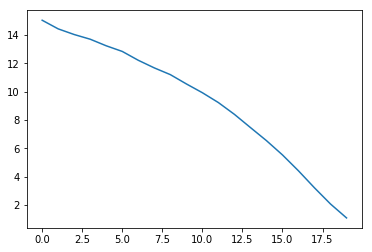

In [18]:
log_rank = list(map(lambda elem: math.log(elem[0] * number_words_in_collection), cf))

log_rank_len = math.log2(len(log_rank))

x = list(range(int(log_rank_len)))

y = [log_rank[2 ** i] for i in x]

plt.plot(x, y)